## Step 1. Import Library

In [5]:
from datasets import load_dataset
ROOT = "./bgOn_heatmapOn_trajOn/" #bgOn_heatmapOn_trajOn

## Step 2. Load Dataset

In [6]:
#train_ds = load_dataset("json", data_files="./image_gt_train.json", split="train")#[:5%]
#test_ds = load_dataset("json", data_files="./image_gt_test.json", split="train")#[:5%]
#train_ds
dataset = load_dataset("json", data_files="./image_gt.json", split="train")#[:5%], image_gt, image_description
datasets = dataset.train_test_split(test_size=0.05)
dataset

Dataset({
    features: ['image1', 'image2', 'class'],
    num_rows: 4600
})

In [7]:
train_ds = datasets["train"]
test_ds = datasets["test"]
train_ds

Dataset({
    features: ['image1', 'image2', 'class'],
    num_rows: 4370
})

['Pair-25-Comp-EYE_trial25_playerA.jpg', 'Pair-33-Coop-EYE_trial15_playerA.jpg', 'Pair-31-A-Single-EYE_trial30_player.jpg', 'Pair-35-A-Single-EYE_trial11_player.jpg', 'Pair-25-Coop-EYE_trial01_playerA.jpg']
['Pair-25-Comp-EYE_trial25_playerB.jpg', 'Pair-33-Coop-EYE_trial15_playerB.jpg', 'Pair-31-A-Single-EYE_trial30_observer.jpg', 'Pair-35-A-Single-EYE_trial11_observer.jpg', 'Pair-25-Coop-EYE_trial01_playerB.jpg']


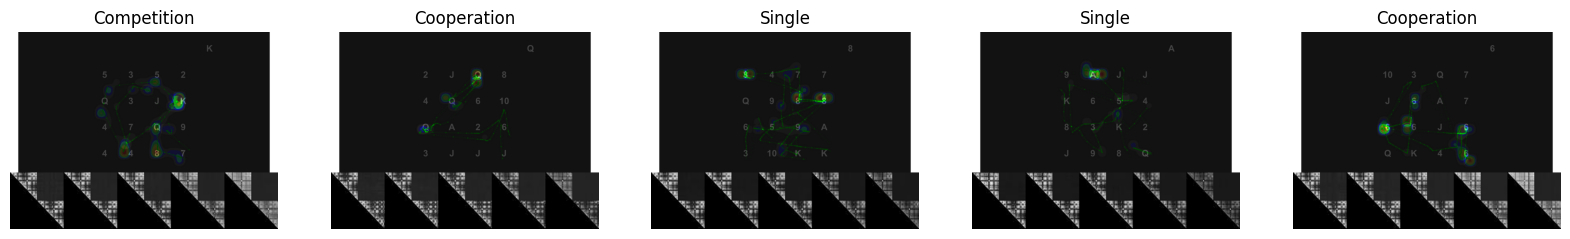

In [9]:
from textwrap import wrap
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import os
import re

def extract_pair_info(filepath):
    # Extract only the filename from the full path
    filename = os.path.basename(filepath)
    
    # Regular expression to match the required pattern
    pattern = r"^(Pair-\d+)(?:-[AB])?-(Coop|Comp|Single)"
    
    match = re.match(pattern, filename)
    if match:
        return f"{match.group(1)}-{match.group(2)}"
    return None  # Return None if the pattern does not match

def concate_plvimg(img_path):
    plv_img = "./plvimg/" + extract_pair_info(img_path)
    # List of image file paths
    image_paths = [plv_img+"-delta.jpg", plv_img+"-theta.jpg", plv_img+"-alpha.jpg", plv_img+"-beta.jpg", plv_img+"-gamma.jpg"]

    # Load images
    images = [Image.open(img) for img in image_paths]

    # Get total width and max height
    total_width = sum(img.width for img in images)
    max_height = max(img.height for img in images)

    # Create new blank image
    concatenated_image = Image.new("RGB", (total_width, max_height))

    # Paste images side by side
    x_offset = 0
    for img in images:
        concatenated_image.paste(img, (x_offset, 0))
        x_offset += img.width
    
    #concatenated_image.show()  # Show the image
    return concatenated_image

def plot_images(images1, images2, captions):
    plt.figure(figsize=(20, 20))
    for i in range(len(images1)):
        img_path = ROOT + images1[i]
        image1 = Image.open(img_path)
        img_path = ROOT + images2[i]
        image2 = Image.open(img_path)
        image2 = image2.resize((image1.width, image1.height))
        plvimg = concate_plvimg(img_path)
        
        
        # Concate
        ## 創建拼接後的新圖片（寬度為兩張圖片寬度之和）
        # new_width = image1.width
        # new_height = image1.height + image2.height
        # concatenated_image = Image.new('RGB', (new_width, new_height))
        # ## 將圖片粘貼到新圖片上
        # concatenated_image.paste(image1, (0, 0))
        # concatenated_image.paste(image2, (0, image1.height))

        # Subtract
        # ## Convert images to NumPy arrays
        # arr1 = np.array(image1, dtype=np.int16)  # Use int16 to prevent underflow
        # arr2 = np.array(image2, dtype=np.int16)
        # ## Subtract images (ensure values remain in valid range)
        # diff_arr = np.clip(arr2 - arr1, 0, 255).astype(np.uint8)  # Clip values to [0, 255]
        # ## Convert back to image
        # concatenated_image = Image.fromarray(diff_arr)

        # Dot product
        ## Convert images to NumPy arrays
        arr1 = np.array(image1, dtype=np.float32)  # Use float32 to avoid overflow
        arr2 = np.array(image2, dtype=np.float32)
        ## Dot product (element-wise multiplication)
        dot_arr = np.clip(arr1 * arr2 / 255.0, 0, 255).astype(np.uint8)  # Normalize to prevent overflow
        ## Convert back to image
        concatenated_image = Image.fromarray(dot_arr)


        # Ensure both images have the same width
        new_plv_height = int(concatenated_image.height * 0.4)  # Adjust ratio
        plvimg = plvimg.resize((concatenated_image.width, new_plv_height))
        # Create a new blank image with concatenated height
        total_height = concatenated_image.height + plvimg.height
        combined_image = Image.new("RGB", (concatenated_image.width, total_height))
        # Paste both images
        combined_image.paste(concatenated_image, (0, 0))
        combined_image.paste(plvimg, (0, concatenated_image.height))


        ax = plt.subplot(1, len(images1), i + 1)
        caption = captions[i]
        caption = "\n".join(wrap(caption, 12))
        plt.title(caption)
        plt.imshow(combined_image) #concatenated_image, combined_image
        plt.axis("off")


sample_images1_to_visualize = [train_ds[i]["image1"] for i in range(5)]
sample_images2_to_visualize = [train_ds[i]["image2"] for i in range(5)]
print(sample_images1_to_visualize)
print(sample_images2_to_visualize)
sample_captions = [train_ds[i]["class"] for i in range(5)]
plot_images(sample_images1_to_visualize, sample_images2_to_visualize, sample_captions)

In [12]:
from PIL import Image


def concate_plvimg(img_path):
    plv_img = "./plvimg/" + extract_pair_info(img_path)
    # List of image file paths
    image_paths = [plv_img+"-delta.jpg", plv_img+"-theta.jpg", plv_img+"-alpha.jpg", plv_img+"-beta.jpg", plv_img+"-gamma.jpg"]

    # Load images
    images = [Image.open(img) for img in image_paths]

    # Get total width and max height
    total_width = sum(img.width for img in images)
    max_height = max(img.height for img in images)

    # Create new blank image
    concatenated_image = Image.new("RGB", (total_width, max_height))

    # Paste images side by side
    x_offset = 0
    for img in images:
        concatenated_image.paste(img, (x_offset, 0))
        x_offset += img.width
    
    #concatenated_image.show()  # Show the image
    return concatenated_image

img_path = "./bgOn_heatmapOn_trajOn/Pair-37-Coop-EYE_trial15_playerA.jpg"
newimage = concate_plvimg(img_path)


## Step 3. Preprocess Data 

In [13]:
from transformers import AutoProcessor, GitProcessor, AutoModelForCausalLM

checkpoint = "microsoft/git-base"
#processor = AutoProcessor.from_pretrained(checkpoint)
processor = GitProcessor.from_pretrained(checkpoint)

model = AutoModelForCausalLM.from_pretrained(checkpoint)

In [14]:
from PIL import Image

def transforms(example_batch):
    #root = "./bgOff_heatmapOn_trajOn/"
    
    concatenated_images = []
    
    # 拼接兩張圖片
    for img_path1, img_path2 in zip(example_batch["image1"], example_batch["image2"]):
        image1 = Image.open(ROOT + img_path1)
        image2 = Image.open(ROOT + img_path2)
        image2 = image2.resize((image1.width, image1.height))

        # Concate
        ## 創建拼接後的新圖片（寬度為兩張圖片寬度之和）
        # new_width = image1.width
        # new_height = image1.height + image2.height
        # concatenated_image = Image.new('RGB', (new_width, new_height))
        # ## 將圖片粘貼到新圖片上
        # concatenated_image.paste(image1, (0, 0))
        # concatenated_image.paste(image2, (0, image1.height))

        # Subtract
        ## Convert images to NumPy arrays
        arr1 = np.array(image1, dtype=np.int16)  # Use int16 to prevent underflow
        arr2 = np.array(image2, dtype=np.int16)
        ## Subtract images (ensure values remain in valid range)
        diff_arr = np.clip(arr2 - arr1, 0, 255).astype(np.uint8)  # Clip values to [0, 255]
        ## Convert back to image
        concatenated_image = Image.fromarray(diff_arr)

        # Dot product
        ## Convert images to NumPy arrays
        # arr1 = np.array(image1, dtype=np.float32)  # Use float32 to avoid overflow
        # arr2 = np.array(image2, dtype=np.float32)
        # ## Dot product (element-wise multiplication)
        # dot_arr = np.clip(arr1 * arr2 / 255.0, 0, 255).astype(np.uint8)  # Normalize to prevent overflow
        # ## Convert back to image
        # concatenated_image = Image.fromarray(dot_arr)        
        
        # 將拼接的圖片加入列表
        concatenated_images.append(concatenated_image)
    
    # 加載文本標籤
    captions = [x for x in example_batch["class"]]
    
    # 將拼接後的圖片和標籤進行處理
    inputs = processor(images=concatenated_images, text=captions, padding="max_length", max_length=128, truncation=True)
    inputs.update({"labels": inputs["input_ids"]})
    return inputs

# 設定 transforms 給 train 和 test 資料集
train_ds.set_transform(transforms)
test_ds.set_transform(transforms)


In [15]:
print(train_ds[0])

{'input_ids': [101, 2971, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'pixel_values': array([[[-1.7922626, -1.7922626, -1.7922626, ..., -1.7922626,
         -1.7922626, -1.7922626],
        [-1.7922626, -1.7922626, -1.7922626, ..., -1.7922626,
         -1.792

In [16]:
from evaluate import load
import torch

# Load the metrics
#accuracy_metric = load("accuracy")
#precision_metric = load("precision")
#recall_metric = load("recall")
f1_metric = load("f1")



def compute_metrics(eval_pred):
    torch.cuda.empty_cache()
    with torch.no_grad():
        print(eval_pred)
        logits, labels = eval_pred
        predicted = logits.argmax(-1)

        decoded_labels = [label.lower() for label in processor.batch_decode(labels, skip_special_tokens=True)]
        decoded_predictions = [pred.lower() for pred in processor.batch_decode(predicted, skip_special_tokens=True)]

        label_mapping = {"cooperation": 0, "single": 1, "competition": 2}
        encoded_labels = [label_mapping.get(label, 4) for label in decoded_labels]
        encoded_predictions = [label_mapping.get(pred, 4) for pred in decoded_predictions]

        # Calculate each metric
        #accuracy = accuracy_metric.compute(predictions=encoded_predictions, references=encoded_labels)
        #precision = precision_metric.compute(predictions=encoded_predictions, references=encoded_labels, average="weighted")
        #recall = recall_metric.compute(predictions=encoded_predictions, references=encoded_labels, average="weighted")
        f1_score = f1_metric.compute(predictions=encoded_predictions, references=encoded_labels, average="weighted")

    torch.cuda.empty_cache()
    return {
        #"accuracy": accuracy['accuracy'],
        #"precision": precision['precision'],
        #"recall": recall['recall'],
        "f1_score": f1_score['f1']
    }


Using the latest cached version of the module from /home/cnelabai/.cache/huggingface/modules/evaluate_modules/metrics/evaluate-metric--f1/34c46321f42186df33a6260966e34a368f14868d9cc2ba47d142112e2800d233 (last modified on Sun Jan 12 23:37:16 2025) since it couldn't be found locally at evaluate-metric--f1, or remotely on the Hugging Face Hub.


In [18]:
from transformers import TrainingArguments, Trainer


training_args = TrainingArguments(
    output_dir=ROOT + "checkpoint(sub)",
    learning_rate=5e-5,
    num_train_epochs=10,
    fp16=True,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=1,
    gradient_accumulation_steps=4,
    eval_accumulation_steps=32,
    save_total_limit=3,
    eval_strategy="steps",
    eval_steps=50, #50
    save_strategy="steps",
    save_steps=50,
    logging_steps=50,
    remove_unused_columns=False,
    push_to_hub=False,
    label_names=["labels"],
    load_best_model_at_end=True,
    report_to="none"
)

In [19]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=test_ds,
    compute_metrics=compute_metrics,
)

/home/cnelabai/anaconda3/envs/hugging/lib/python3.12/site-packages/accelerate/accelerator.py:494: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.scaler = torch.cuda.amp.GradScaler(**kwargs)


In [20]:
trainer.train()


  0%|          | 0/680 [00:00<?, ?it/s]

{'loss': 7.2093, 'grad_norm': 40.22352600097656, 'learning_rate': 4.639705882352942e-05, 'epoch': 0.73}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 4.326955318450928, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 30.3652, 'eval_samples_per_second': 7.574, 'eval_steps_per_second': 7.574, 'epoch': 0.73}
{'loss': 2.1525, 'grad_norm': 13.89699935913086, 'learning_rate': 4.272058823529412e-05, 'epoch': 1.46}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.34207212924957275, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.8875, 'eval_samples_per_second': 7.696, 'eval_steps_per_second': 7.696, 'epoch': 1.46}
{'loss': 0.1347, 'grad_norm': 0.2909579873085022, 'learning_rate': 3.9044117647058823e-05, 'epoch': 2.19}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.01693231239914894, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.6931, 'eval_samples_per_second': 7.746, 'eval_steps_per_second': 7.746, 'epoch': 2.19}
{'loss': 0.0121, 'grad_norm': 0.14089566469192505, 'learning_rate': 3.5367647058823536e-05, 'epoch': 2.92}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.010421965271234512, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.6724, 'eval_samples_per_second': 7.751, 'eval_steps_per_second': 7.751, 'epoch': 2.92}
{'loss': 0.0101, 'grad_norm': 0.10324461758136749, 'learning_rate': 3.1691176470588236e-05, 'epoch': 3.65}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.010081919841468334, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.9866, 'eval_samples_per_second': 7.67, 'eval_steps_per_second': 7.67, 'epoch': 3.65}
{'loss': 0.0097, 'grad_norm': 0.1469324827194214, 'learning_rate': 2.8014705882352942e-05, 'epoch': 4.38}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.009423981420695782, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.456, 'eval_samples_per_second': 7.808, 'eval_steps_per_second': 7.808, 'epoch': 4.38}
{'loss': 0.0093, 'grad_norm': 0.09122894704341888, 'learning_rate': 2.433823529411765e-05, 'epoch': 5.11}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.009508863091468811, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.3339, 'eval_samples_per_second': 7.841, 'eval_steps_per_second': 7.841, 'epoch': 5.11}
{'loss': 0.0093, 'grad_norm': 0.0996018648147583, 'learning_rate': 2.066176470588235e-05, 'epoch': 5.84}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.009097653441131115, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.3217, 'eval_samples_per_second': 7.844, 'eval_steps_per_second': 7.844, 'epoch': 5.84}
{'loss': 0.009, 'grad_norm': 0.032097600400447845, 'learning_rate': 1.698529411764706e-05, 'epoch': 6.57}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.009033611975610256, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.1097, 'eval_samples_per_second': 7.901, 'eval_steps_per_second': 7.901, 'epoch': 6.57}
{'loss': 0.009, 'grad_norm': 0.050524257123470306, 'learning_rate': 1.3308823529411765e-05, 'epoch': 7.3}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.009271509014070034, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.3211, 'eval_samples_per_second': 7.844, 'eval_steps_per_second': 7.844, 'epoch': 7.3}
{'loss': 0.0088, 'grad_norm': 0.08805017173290253, 'learning_rate': 9.632352941176471e-06, 'epoch': 8.03}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.008992276154458523, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.6424, 'eval_samples_per_second': 7.759, 'eval_steps_per_second': 7.759, 'epoch': 8.03}
{'loss': 0.0088, 'grad_norm': 0.06132238730788231, 'learning_rate': 5.955882352941177e-06, 'epoch': 8.76}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.009214567020535469, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 28.6763, 'eval_samples_per_second': 8.021, 'eval_steps_per_second': 8.021, 'epoch': 8.76}
{'loss': 0.0088, 'grad_norm': 0.02660590037703514, 'learning_rate': 2.279411764705882e-06, 'epoch': 9.49}


  0%|          | 0/230 [00:00<?, ?it/s]

{'eval_loss': 0.008945316076278687, 'eval_f1_score': 0.25461293743372215, 'eval_runtime': 29.1793, 'eval_samples_per_second': 7.882, 'eval_steps_per_second': 7.882, 'epoch': 9.49}
{'train_runtime': 3978.9054, 'train_samples_per_second': 10.983, 'train_steps_per_second': 0.171, 'train_loss': 0.7056452603901133, 'epoch': 9.93}


TrainOutput(global_step=680, training_loss=0.7056452603901133, metrics={'train_runtime': 3978.9054, 'train_samples_per_second': 10.983, 'train_steps_per_second': 0.171, 'total_flos': 5073655096433664.0, 'train_loss': 0.7056452603901133, 'epoch': 9.927007299270073})